<a href="https://colab.research.google.com/github/Julianpucheta/HCSPD2025/blob/main/Semana%205/Clase_05_HCSPD_P%C3%A9ndulo_Estable_en_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación de sistemas diámicos no lineales en R

##Creación del cuaderno en el entorno **R**
El Notebook debe crearse con la instrucción siguiente

https://colab.research.google.com/?authuser=1#create=true&language=r

con el fin de que en el entorno de ejecución del Colab se **cargue el entorno R por defecto**.

Mas también en https://rafalab.dfci.harvard.edu/dsbook/r-basics.html.
Libro recomendado [Dalgaard](https://mega.nz/file/a05HiTpY#CxHr9LSE929vpDxsiRNSaFSjHK0MZmjujVvmOneqZcE). Introductory Statistics with R.

##Pruebas iniciales
Para empezar a probar comandos, en R como entorno de ejecución adentro de Colab no es necesario incluir librerías al inicio, salvo las que sean especializadas.


In [1]:
library(tidyverse) #una versión simplificada está cargada por defecto en el Colab

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


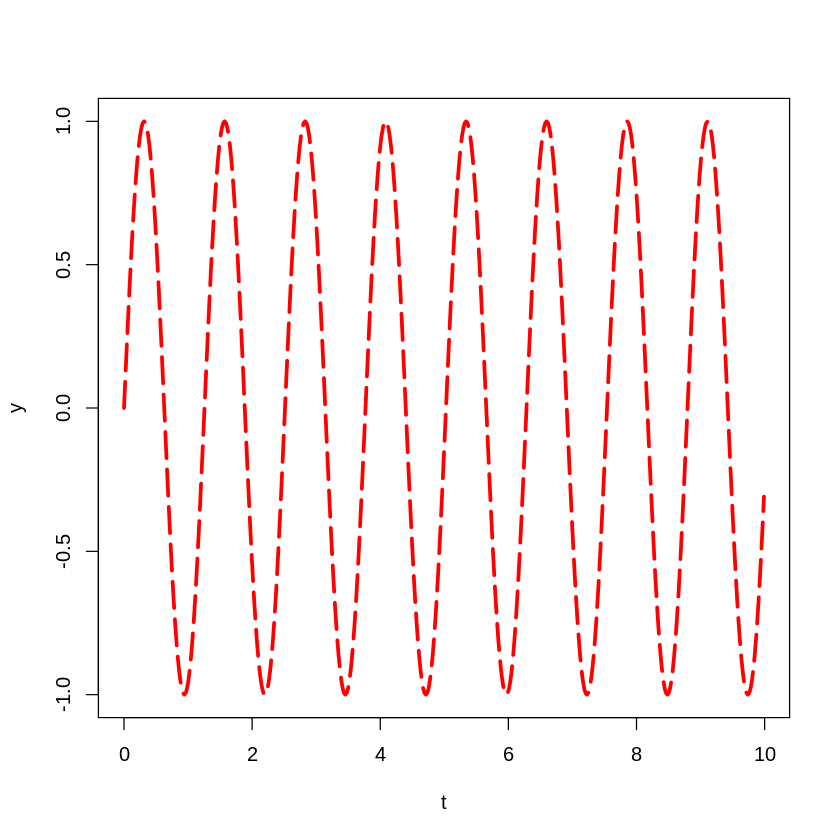

In [2]:
t = seq( 0, 10, by=pi/150) #Generar una secuencia de valores entre 0 y 10 de pasos pi/150
y = sin(5*t) # Obtener la función seno(wt)
plot(t,y, col = "red", type="l", lwd = 3, lty="longdash" ) #plotear el resultado con t como absisa y y en la ordenada
#  type="l", lty=2, lwd=3 , lty="dashed"
# line type (lty) can be specified using either text (“blank”, “solid”, “dashed”, “dotted”, “dotdash”, “longdash”, “twodash”)
#  or number (0, 1, 2, 3, 4, 5, 6). Note that lty = “solid” is identical to lty=1.

Cualquier inquietud, con el comando `??` se puede obtener ayuda en la solapa derecha. Por ejemplo, para saber sobre el uso de plot, sería `?? plot`. Y para saber sobre una librería en particular, library(help = "tidyverse")

In [3]:
?? plot

In [4]:
library(help = "tidyverse")

##Simulación numérica del Péndulo en el equilibrio estable
Se pretende realizar un script para simular el comportamiento del péndulo simple e invertido empleando el lenguaje R sobre Colab.

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} - m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = -g \cdot (\pi-\phi) - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.
Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.

Luego de linealizar, se obtienen las matrices del sistema lineal
\begin{equation*}
A =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & -\frac{F}{M} & -\frac{g\cdot m}{M} & 0\\
0 & 0 & 0 & 1 \\
0 & -\frac{F}{M \cdot long} & -\frac{g \cdot (M+m)}{M \cdot long} & 0 \\
\end{bmatrix}
\end{equation*}
y
\begin{equation*}
B =
\begin{bmatrix}
0\\
\frac{1}{M}\\
0 \\
\frac{1}{M \cdot long} \\
\end{bmatrix}
\end{equation*}

en el punto de operación de $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $ \textbf{ x$_{OP}$=[0,0,$\pi$,0]$^T$} $.

Por lo tanto, la expresión lineal se convierte en
\begin{equation*}
\dot{x}=A \cdot (x-x_{OP})+B \cdot u
\end{equation*}
para una $\textbf {x(0)}$ dada en $\approx\phi$ para $x(3)$.

In [5]:
#https://colab.research.google.com/?authuser=1#create=true&language=r
#La linea superior crea el Notebook, el authuser=1 indica el usuario del Chrome, en mi caso, 0 es gmail y 1 es UNC.edu.ar
#R.version.string
#print(installed.packages())
#https://www.datacamp.com/community/tutorials/tutorial-on-loops-in-r
#https://www.datacamp.com/community/tutorials/functions-in-r-a-tutorial
# $ R #No son necesarios en Colab
#rm(list=ls(all=TRUE)) #es BORRAR todo #No son necesarios en Colab
X = numeric(4)
dim(X) <- c(4,1)
ii=0;t_etapa=1e-3
tF=1e1;
Ts=t_etapa;
At=Ts;
Kmax=(tF/At); #fix() No es necesario en Colab
########################################
X0<-c(0,0,pi,0)
dim(X0) <- c(4,1)
print("x inicial es")
print(X0)
########################################
#  delta     = x1
#  delta_p   = x2
#  phi       = x3
#  phi_p     = x4
########################################
m=.1; F=0.1; long=0.6;g=9.8;M=.5;
#e=zeros(round(tF/t_etapa),1);
#e <- numeric(tF/t_etapa)
#dim(e) <- c(tF/t_etapa,1)
u=0.;
x1 <- numeric(tF/t_etapa) #delta
dim(x1) <- c(tF/t_etapa,1)
x2 <- numeric(tF/t_etapa) #delta_p
dim(x2) <- c(tF/t_etapa,1)
##################################################################
x3 <- numeric(tF/t_etapa)#phi
dim(x3) <- c(tF/t_etapa,1)
x4 <- numeric(tF/t_etapa)#phi_p
dim(x4) <- c(tF/t_etapa,1)
##################################################################
acc <- numeric(tF/t_etapa)
dim(acc) <- c(tF/t_etapa,1)
###################################################################
A    <-c(0,1,0,0,0,-(F/M),-((g*m)/(M)),0,0,0,0,1,0,-((F)/(M*long)),-(g*(M+m))/(M*long),0);
# Mat_A=[0 1 0 0;0 -F/M -m*g/M 0; 0 0 0 1; 0 -F/(long*M) -g*(m+M)/(long*M) 0]
dim(A) <- c(4,4) #print(A)
A<-t(A)
print("La matriz A es")
print(A)
# Mat_B=[0; 1/M; 0; 1/(long*M)]
B <-    c(0,1/M,0,(1/(M*long)))
dim(B) <- c(4,1)#genero matriz 4x1 filaXcolumna
print("La matriz B es")
print(B)
##################################################################
p <- numeric(tF/t_etapa)
dim(p) <- c(tF/t_etapa,1)
p_p <- numeric(tF/t_etapa)
dim(p_p) <- c(tF/t_etapa,1)
phi <- numeric(tF/t_etapa)
dim(phi) <- c(tF/t_etapa,1)
phi_p <- numeric(tF/t_etapa)
dim(phi_p) <- c(tF/t_etapa,1)
tita_pp=0.
p_pp=0.
p[1]=0.
p_p[1]=0.
X[3] = pi -.51 #Si es.1 en 10 seg no se distingue
phi_p[1]=0.
phi[1]=X[3]
for(i in 0:(tF/At)) {
    ii<-ii+1
    x1[ii]<-X[1] # X1 delta
    x2[ii]<-X[2] # X2 delta_p
    x3[ii]<-X[3] # X3 phi
    x4[ii]<-X[4] # X4 phi_p
    xp = A %*% (X-X0) + B%*% u
    X = X+ xp*At
    acc[ii] <-u
    tita_pp <- (g * sin(phi[ii]) -p_pp * cos(phi[ii])) / long
    p_pp <-(u  - m * long * tita_pp *cos(phi[ii]) + m * long * (phi_p[ii]^2) * sin(phi[ii]) - F * p_p[ii])/(M+m)
    p_p[ii+1] <-   p_p[ii]  +p_pp*At
    p[ii+1] <-     p[ii]    + p_p[ii]*At
    phi_p[ii+1] <- phi_p[ii]+At*tita_pp
    phi[ii+1] <- phi[ii] +At*phi_p[ii]
}
t1<-seq(from=0,to=tF,by=At)  #seq(from, to, by= )
t2<-seq(0,tF+At,At)

[1] "x inicial es"
         [,1]
[1,] 0.000000
[2,] 0.000000
[3,] 3.141593
[4,] 0.000000
[1] "La matriz A es"
     [,1]       [,2]   [,3] [,4]
[1,]    0  1.0000000   0.00    0
[2,]    0 -0.2000000  -1.96    0
[3,]    0  0.0000000   0.00    1
[4,]    0 -0.3333333 -19.60    0
[1] "La matriz B es"
         [,1]
[1,] 0.000000
[2,] 2.000000
[3,] 0.000000
[4,] 3.333333


In [6]:
png(file="Imag_R_plot.png", width=1920, height=2096, res = 300) #Acá empieza a imprimir. Para ello, descomentar ésta linea y la de dev.off() para que termine
par(mfrow=c(2,2))
plot(t1, x1,  type="s",   main="delta [X1]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta")
lines(t1,p[1:length(p)-1],   main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
plot(t1,x2,      type="s",main="delta p [X2]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
lines(t1,p_p[1:length(p)-1],   main="delta p [X2]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
plot(t1,x3,      type="s",main="phi [X3]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi")
lines(t1,phi[1:length(p)-1],   main="phi [X3]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="phi")
plot(t1,x4,     type="s", main="phi p [X4]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")
lines(t1,phi_p[1:length(p)-1],   main="phi p [X4]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")
dev.off() #Acá termina de imprimir

pdf 
  2

Para ver la imagen guardada en el entorno, se puede previsualizar con la librería `png`.

In [7]:
install.packages('png')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



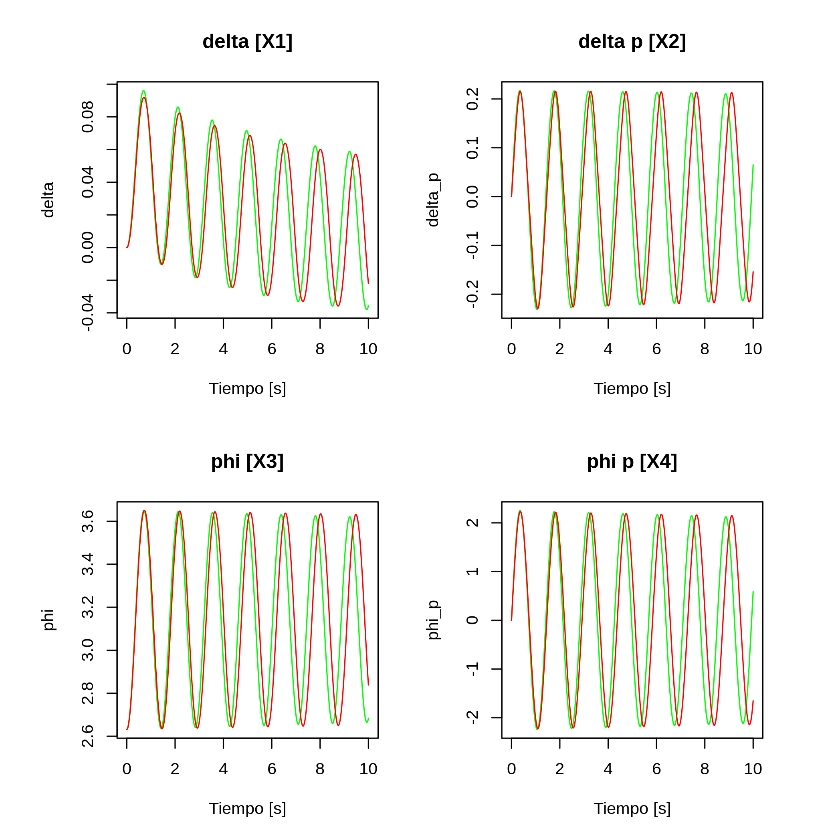

In [8]:
library(png)
img = readPNG("Imag_R_plot.png")
grid::grid.raster(img)

Para graficar directamente.

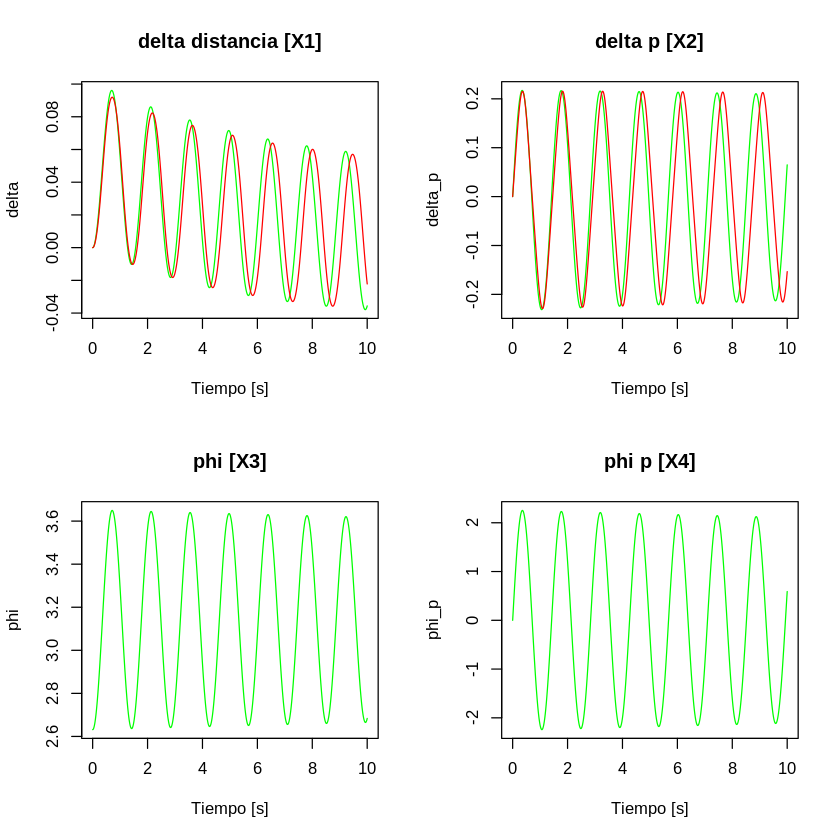

In [9]:
par(mfrow=c(2,2))
#plot(t1,x1,     main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
#plot(xy.coords(t1, x1), type = "l",    main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
plot(xy.coords(t1, x1), type = "s",    main="delta distancia [X1]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta")
lines(t2, p,     main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
#plot.xy(xy.coords(x, y), type = type, ...) :
plot(xy.coords(t1, x2), type = "s",     main="delta p [X2]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
lines(t2,p_p,     main="delta p [X2]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
plot(xy.coords(t1, x3), type = "s",     main="phi [X3]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi")
# lines(t2,phi,     main="phi [X3]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="phi")
plot(xy.coords(t1, x4), type = "s",     main="phi p [X4]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")
# lines(t2,phi_p,     main="phi p [X4]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")

## Organizar los datos en un Dataframe

In [13]:
Datos_temporales <- data.frame(
  "t" = t1,
  "desplazamiento" = x1,
  "desp_delta"= p[1:length(p)-1],
  "velocidad" = x2,
  "veloc_delta"= p_p[1:length(p)-1],
  "angulo"=x3,
  "phi"=phi[1:length(p)-1],
  "vel_angular"= x4,
  "phi_p"=  phi_p[1:length(p)-1]
)
tail(Datos_temporales,3) #muestra los 5 primeros datos y sus nombres

,t,desplazamiento,desp_delta,velocidad,veloc_delta,angulo,phi,vel_angular,phi_p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9999,9.998,-0.03574339,-0.02172576,0.06314262,-0.1554704,2.682589,2.841877,0.5718539,-1.664715
10000,9.999,-0.03568025,-0.02188123,0.06402964,-0.1548003,2.683161,2.840212,0.5808293,-1.658829
10001,10.000,-0.03561622,-0.02203603,0.06491536,-0.1541280,2.683742,2.838553,0.5897932,-1.652914


## Librería para graficar ggplot2
The Grammar of Graphics and the ggplot2 Package

Más en https://ggplot2-book.org/arranging-plots.html.


In [ ]:
# library(ggplot2) #ya está cargada por el tidyverse

In [11]:
library(help = "ggplot2")

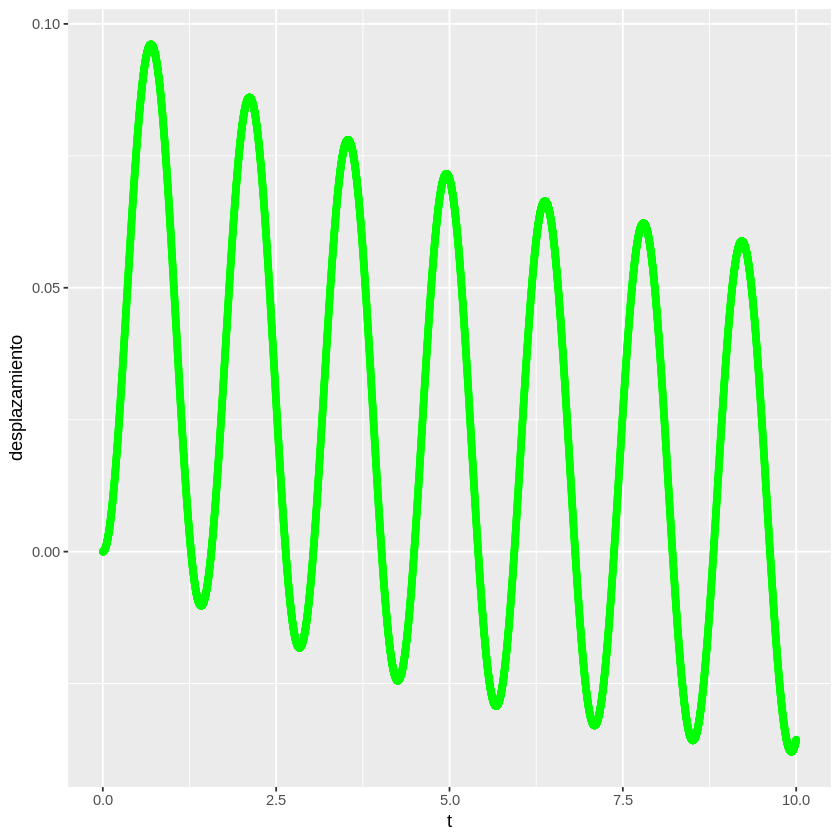

In [14]:
# qplot(Datos_temporales.t, Datos_temporales.desplazamiento, data=.) #Obsoleto
ggplot(Datos_temporales) + geom_point(aes(x=t, y=desplazamiento), col = "green")

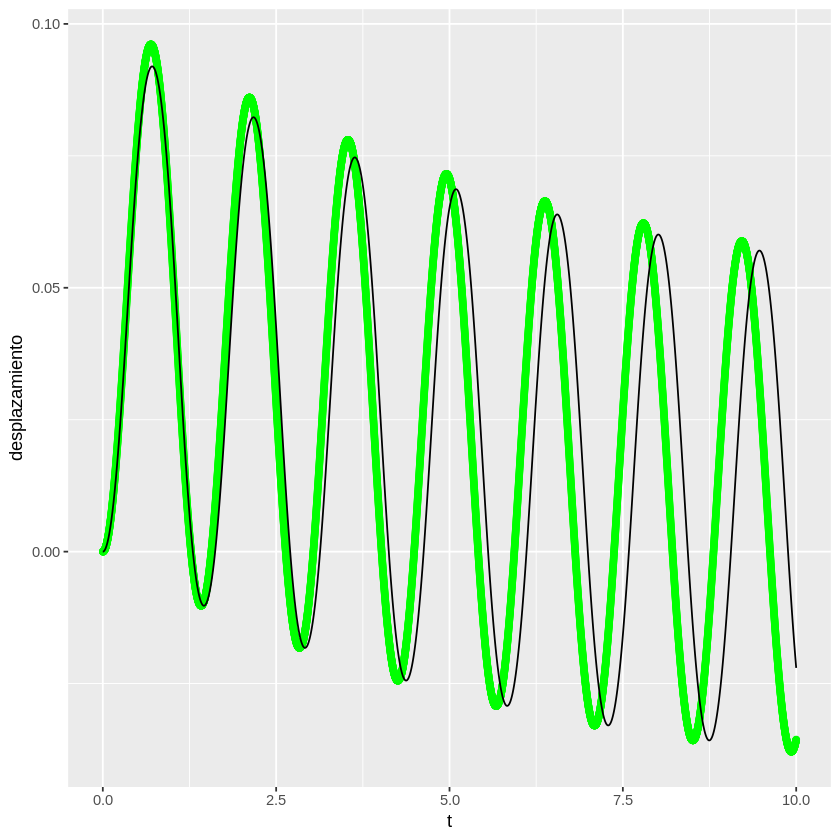

In [15]:
ggplot(Datos_temporales, aes(x=t, y=desplazamiento)) + geom_point(col = "green") +
  geom_line(aes(y = desp_delta))

## Graficar resultados en mosaico

In [16]:
# Se carga la librería necesaria
install.packages('patchwork')
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



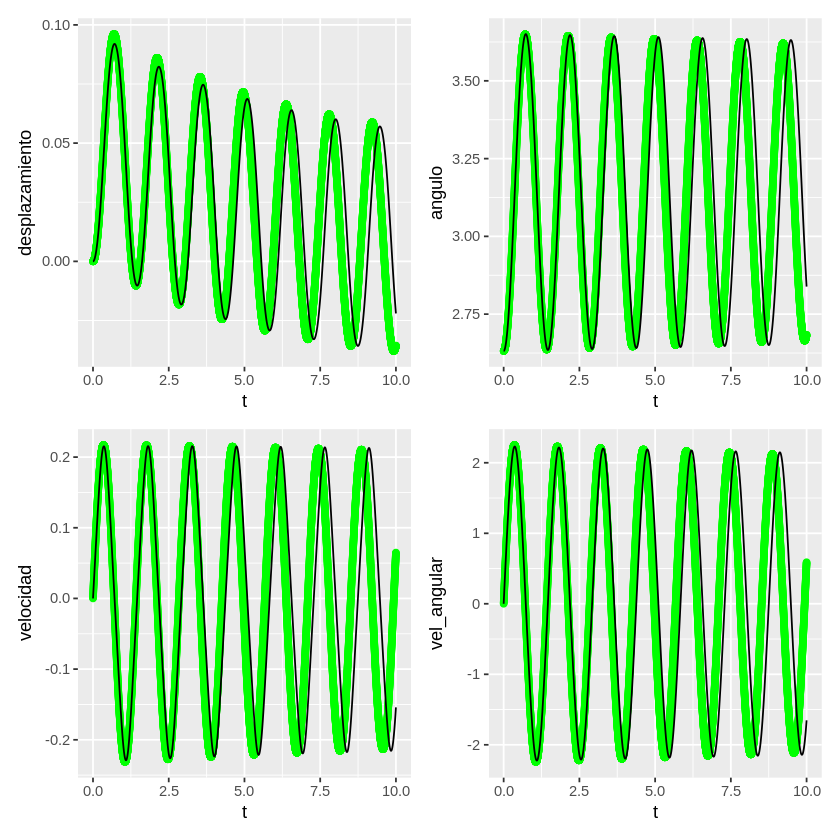

In [17]:
p1<-ggplot(Datos_temporales, aes(x=t, y=desplazamiento)) + geom_point(col = "green")+
  geom_line(aes(y = desp_delta))
p2<- ggplot(Datos_temporales, aes(x=t, y=angulo)) + geom_point(col = "green")+
  geom_line(aes(y = phi))
p3<-ggplot(Datos_temporales, aes(x=t, y=velocidad)) + geom_point(col = "green")+
  geom_line(aes(y = veloc_delta))
p4<- ggplot(Datos_temporales, aes(x=t, y=vel_angular)) + geom_point(col = "green")+
  geom_line(aes(y = phi_p))
p1 + p2 + p3 + p4 + plot_layout(ncol = 2)

## Cierre